## Journal used for the implemetation
**Journal Title:** Credit Card Fraud Detection Model Based on
LSTM Recurrent Neural Networks

**Authors:** Ibtissam Benchaji, Samira Douzi, and Bouabid El Ouahidi

**Year:** 2021

**Reason for selection of above Paper for implementation:**
This paper is based on LSTM model which is an excellent choice for Fraud Detection problem as it is designed specifically to handle sequential data like transaction histories. This allows it to learn a user's normal spending patterns over time and flag deviations as potential fraud. This aligns perfectly with the intuitive understanding of how fraud is detected.

The CNN approach, while effective, treats the data as a 2D image, which can lose the inherent sequential nature of transactions and Transformer-based approach is theoretically more advanced but much more complex and less suitable for a straightforward demonstration.

## 1. Import the required libraries

In [140]:
##---------Type the code below this line------------------##
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Data Acquisition

Dataset used: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [141]:
##---------Type the code below this line------------------##
try:
    df = pd.read_csv('creditcard.csv')
    print("Dataset loaded successfully.")
    print(f"Dataset shape: {df.shape}")
    display(df.head())
except FileNotFoundError:
    print("Error: creditcard.csv not found. Please download the dataset from Kaggle and place it in the working directory.")

Dataset loaded successfully.
Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 3. Data Preparation

In [142]:
##---------Type the code below this line------------------##
# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Drop rows with NaN in the target variable
df.dropna(subset=['Class'], inplace=True)
X = df.drop('Class', axis=1)
y = df['Class']

# Normalize 'Time' and 'Amount' features
scaler = StandardScaler()
X['Time'] = scaler.fit_transform(X[['Time']])
X['Amount'] = scaler.fit_transform(X[['Amount']])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

# Handle imbalanced data using SMOTE
print("\nHandling imbalanced data using SMOTE")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"Training set shape after SMOTE: {X_train_resampled.shape}")
print(f"Testing set shape after SMOTE: {X_test.shape}")
print(f"Training target shape after SMOTE: {y_train_resampled.shape}")
print(f"Testing target shape after SMOTE: {y_test.shape}")

# Reshape data for LSTM input (samples, timesteps, features)
X_train_reshaped = np.reshape(X_train_resampled.values, (X_train_resampled.shape[0], 1, X_train_resampled.shape[1]))
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

Training set shape: (227845, 30)
Testing set shape: (56962, 30)
Training target shape: (227845,)
Testing target shape: (56962,)

Handling imbalanced data using SMOTE
Training set shape after SMOTE: (454902, 30)
Testing set shape after SMOTE: (56962, 30)
Training target shape after SMOTE: (454902,)
Testing target shape after SMOTE: (56962,)


## 4. Deep Neural Network Architecture


### 4.1 Design the architecture that you will be using

* CNN / RNN / Transformer as per the journal referenced



In [143]:
##---------Type the code below this line------------------##
# Data Structuring for RNN
# Building the LSTM model
model = keras.Sequential([
    # LSTM layer for sequential data processing
    layers.LSTM(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False),
    # Dropout layer to prevent overfitting
    layers.Dropout(0.2),
    # Dense layer for output
    layers.Dense(1, activation='sigmoid')
])

# Compile the model using Adam optimizer
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters



In [144]:
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_62 (LSTM)                  │ (None, 64)             │        24,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,385 (95.25 KB)

 Trainable params: 24,385 (95.25 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Training the model


In [145]:
# Function to train the given pre-compiled Keras model.

# Args:
#     model: The pre-compiled Keras model to train.
#     X_train: Training features.
#     y_train: Training labels.
#     validation_data: A tuple (X_val, y_val) for validation.
#     epochs: Number of training epochs.
#     batch_size: Batch size for training.

# Returns:
#     A History object containing training history.

def train_model_with_optimizer(model, X_train, y_train, validation_data, epochs=20, batch_size=256):
    # The model is assumed to be defined and compiled with a strategy outside this function.
    # This function only handles the training process.

    # Train the model
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=validation_data,
                        verbose=1)

    return history

## 6. Test the model with different optimizers:

**Important Note:** Though the paper uses Adam optimizer, we have added a code to train, evaluate and compare the results with RMSprop and SGD optimizers as well along with Adam optimizer demonstrating why Adam is better choice w.r.t. context of this implementation.


In [146]:
# Test the model with different optimizers
optimizers = {
    "Adam": tf.keras.optimizers.Adam(),
    "RMSprop": tf.keras.optimizers.RMSprop(),
    "SGD": tf.keras.optimizers.SGD(momentum=0.9)
}

histories = {}
test_results = {}

# Defining the model architecture as a function to easily create new instances
def build_lstm_model(input_shape):
    # Using Input layer as the first layer to resolve the warning observed in above code
    model = keras.Sequential([
        keras.Input(shape=input_shape), # Use Input layer
        layers.LSTM(units=64, return_sequences=False),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Training with different optimizers
for name, optimizer in optimizers.items():
    print(f"\n--- Training with {name} optimizer ---")

    # Create a new model instance for each optimizer and compile the model with the current optimizer
    model = build_lstm_model((X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


    # Train the model
    history = train_model_with_optimizer(model, X_train_reshaped, y_train_resampled, validation_data=(X_test_reshaped, y_test), epochs=20)
    histories[name] = history #Store the training history for visualization

    # Evaluate the model on the test set after training using the compiled model instance
    print(f"\n--- Evaluating with {name} optimizer ---")
    loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Loss: {loss:.4f}")

    # Predictions on the test set
    y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")

    # Confusion matrix and classification report
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))

    # Get F1-score for the fraud class
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"F1-score for Fraud class: {f1:.4f}")

    # Store test results for visualization
    test_results[name] = {
        'loss': loss,
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, target_names=['Normal', 'Fraud'], output_dict=True),
        'f1_score': f1
    }


--- Training with Adam optimizer ---
Epoch 1/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9496 - loss: 0.1638 - val_accuracy: 0.9892 - val_loss: 0.0337
Epoch 2/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9917 - loss: 0.0256 - val_accuracy: 0.9949 - val_loss: 0.0177
Epoch 3/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9967 - loss: 0.0129 - val_accuracy: 0.9969 - val_loss: 0.0117
Epoch 4/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9981 - loss: 0.0084 - val_accuracy: 0.9972 - val_loss: 0.0111
Epoch 5/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9985 - loss: 0.0059 - val_accuracy: 0.9977 - val_loss: 0.0096
Epoch 6/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.9983 - val_loss: 0.0079
Epoch 7/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9990 - loss: 0.0042 - val_accuracy: 0.9983 - val_loss: 0.0072
Epoch 8/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/ste

## 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


Comparison Report for Different Optimizers:

--- Results for Adam Optimizer ---


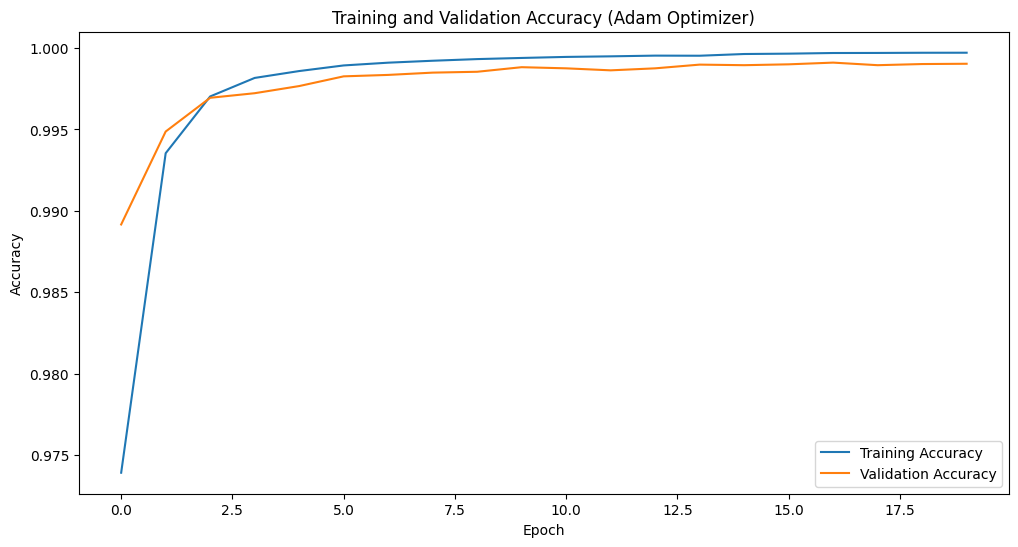

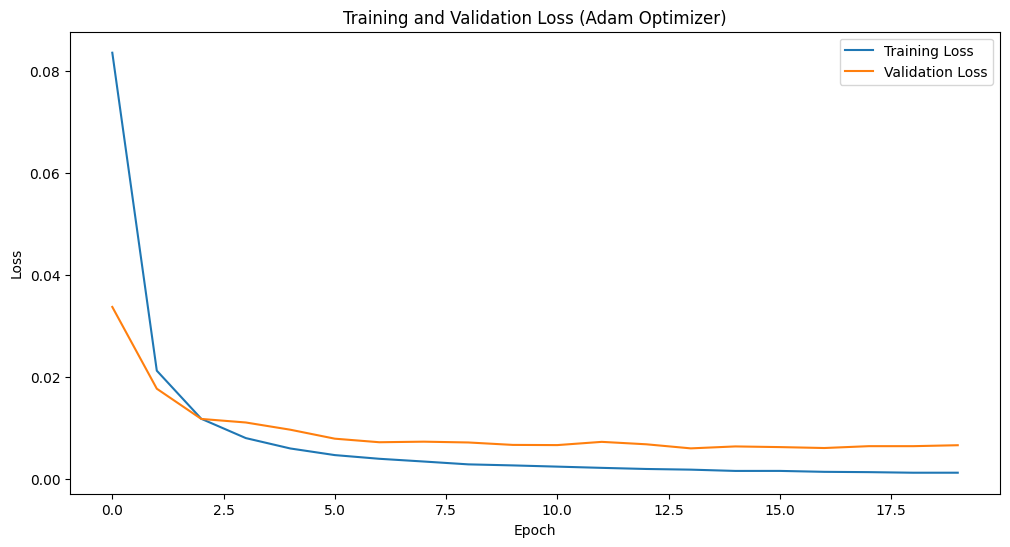


Final Validation Loss: 0.0066
Final Validation Accuracy: 0.9990

--- Results for RMSprop Optimizer ---


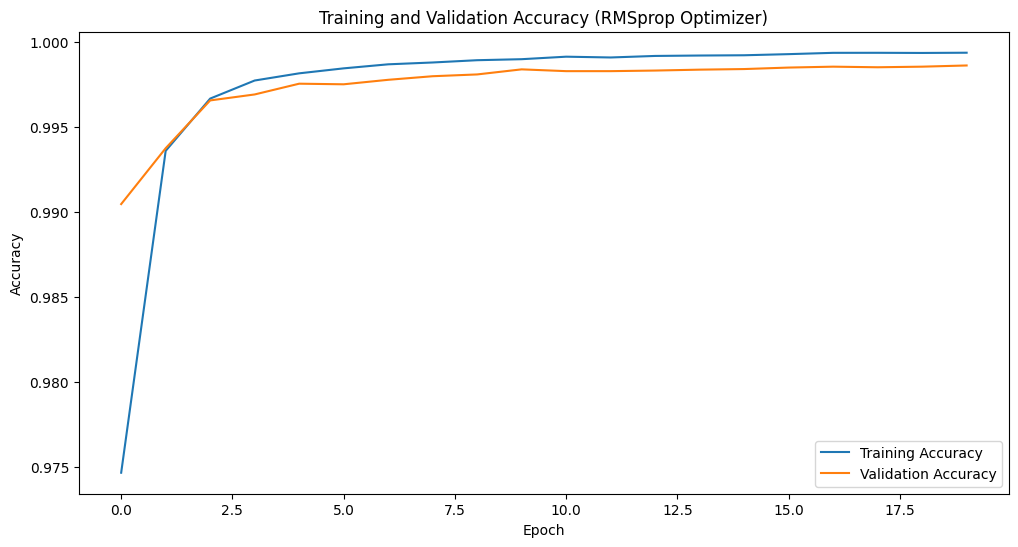

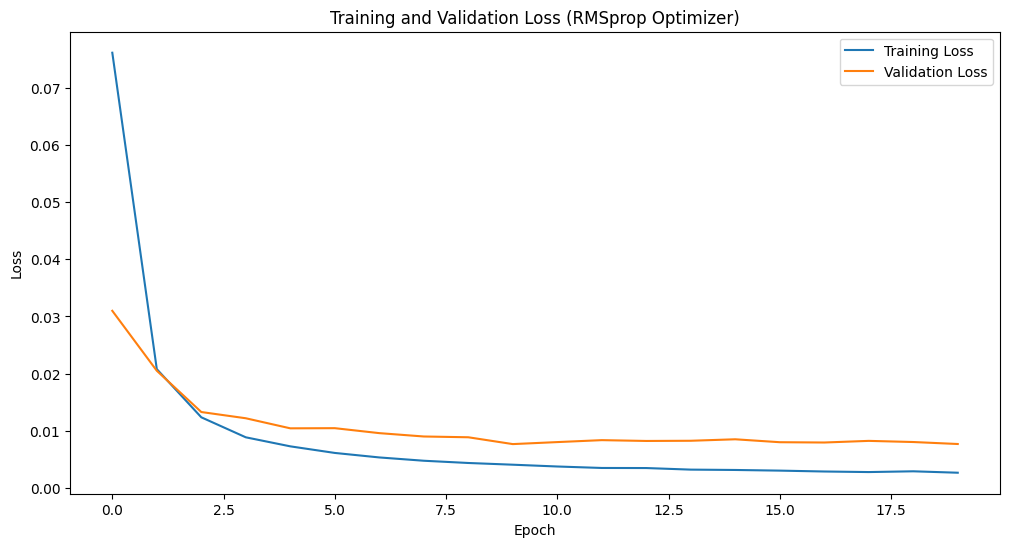


Final Validation Loss: 0.0077
Final Validation Accuracy: 0.9986

--- Results for SGD Optimizer ---


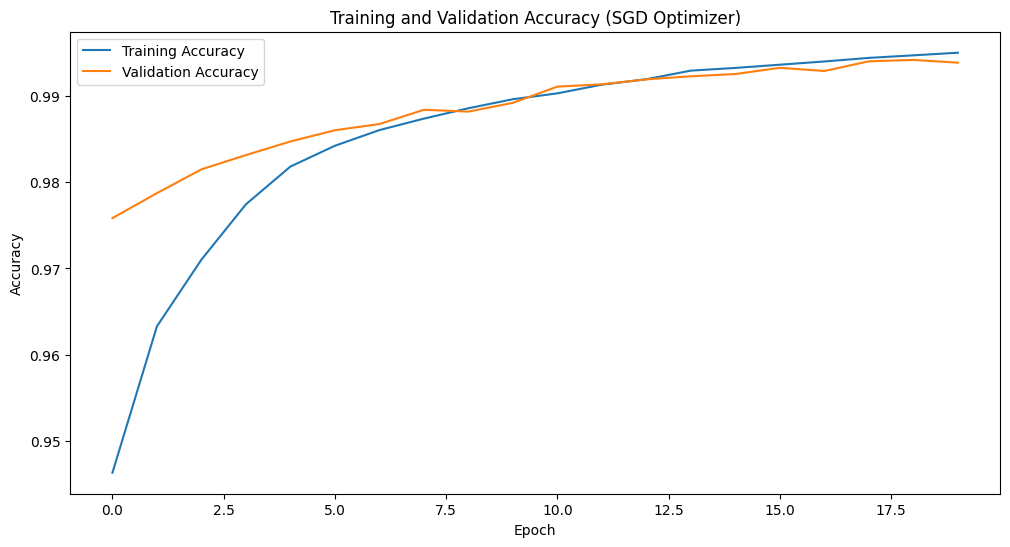

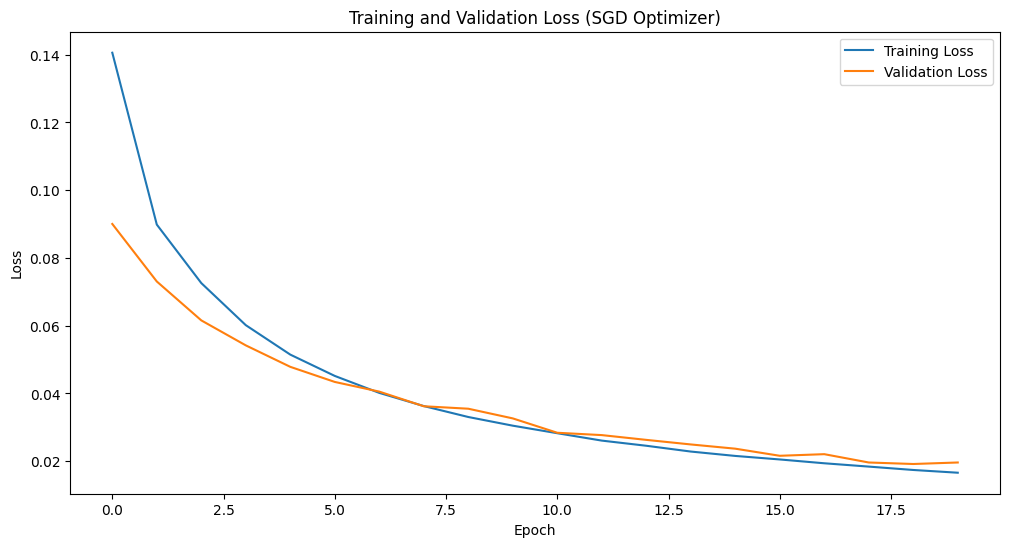


Final Validation Loss: 0.0196
Final Validation Accuracy: 0.9938

--- Confusion Matrices for Different Optimizers ---


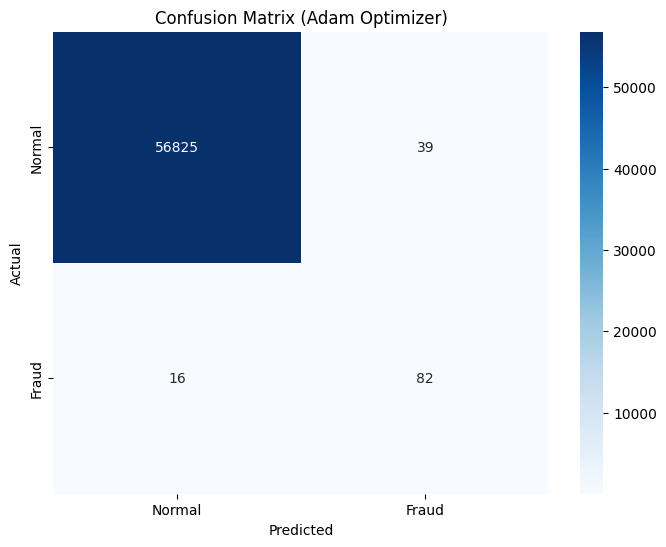

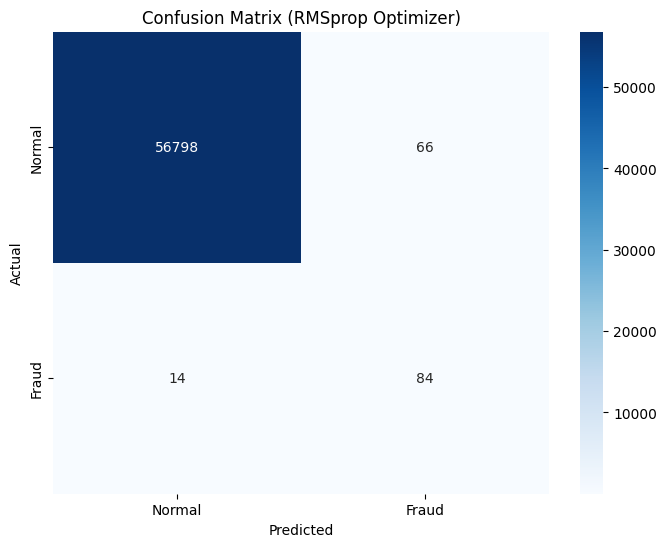

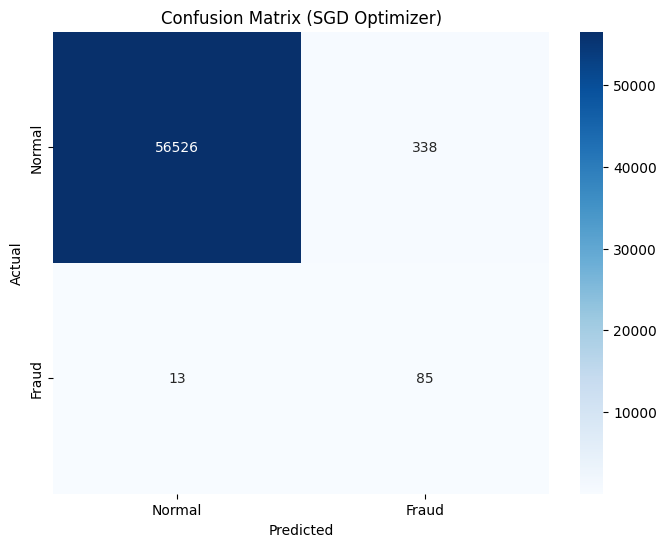


--- Test Performance Comparison Across Optimizers ---


,Test Loss,Test Accuracy,F1-score,Precision,Recall
Adam,0.006594,0.999034,0.748858,0.677686,0.836735
RMSprop,0.007714,0.998596,0.677419,0.560000,0.857143
SGD,0.019628,0.993838,0.326296,0.200946,0.867347


In [147]:
##---------Type the code below this line------------------##

# Plots for each optimizer's history
print("Comparison Report for Different Optimizers:")

for name, history in histories.items():
    print(f"\n--- Results for {name} Optimizer ---")

    # 1. Plot training and validation accuracy history
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy ({name} Optimizer)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # 2. Plot training and validation loss history
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss ({name} Optimizer)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # 3. Report the testing accuracy and loss.
    final_val_accuracy = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]
    print(f"\nFinal Validation Loss: {final_val_loss:.4f}")
    print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")


# 4. Show Confusion Matrix for testing dataset.
print("\n--- Confusion Matrices for Different Optimizers ---")
for name, results in test_results.items():
    cm = results['confusion_matrix']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({name} Optimizer)')
    plt.show()

#5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.
# Dictionary to hold the comparison data
comparison_data = {}
for name, results in test_results.items():
    comparison_data[name] = {
        'Test Loss': results['loss'],
        'Test Accuracy': results['accuracy'],
        'F1-score': results['f1_score'],
        'Precision': results['classification_report']['Fraud']['precision'],
        'Recall': results['classification_report']['Fraud']['recall']
    }

# Convert the dictionary to a pandas DataFrame for easy viewing
comparison_df = pd.DataFrame.from_dict(comparison_data, orient='index')

# Display the comparison table
print("\n--- Test Performance Comparison Across Optimizers ---")
display(comparison_df)

### 8. Analysis and Summary of Results

Based on the training history, test performance metrics presented in the `comparison_df` DataFrame, and the confusion matrices for the three optimizers (Adam, RMSprop, and SGD), here is a summary of the analysis:

**Training and Validation Progress:**

*   **Adam Optimizer:** The training and validation accuracy curves show a rapid increase and converge smoothly, with the validation accuracy closely following the training accuracy, suggesting good generalization. The training and validation loss curves decrease steadily and converge to a low value.
*   **RMSprop Optimizer:** Similar to Adam, RMSprop shows good convergence for both training and validation accuracy and loss. The convergence appears slightly less smooth or stable compared to Adam in the initial epochs, but it still reaches a good performance level.
*   **SGD Optimizer:** The training and validation curves for SGD show a slower and less stable convergence compared to Adam and RMSprop, especially in the initial epochs. The accuracy increases more gradually, and the loss decreases more slowly. This is expected as SGD typically takes more steps to converge, especially without advanced techniques like momentum (although momentum is used here, Adam and RMSprop are generally faster optimizers).

**Test Performance Comparison:**

As shown in the `comparison_df` DataFrame:

*   **Adam Optimizer:** Achieves a high Test Accuracy (0.9990) and the best F1-score for the Fraud class (0.7489). It also demonstrates a good balance of Precision (0.6777) and Recall (0.8367) for the fraud class, indicating its effectiveness in identifying fraud cases with a relatively controlled rate of false positives.
*   **RMSprop Optimizer:** Shows a slightly lower Test Accuracy (0.9986) and a lower F1-score for the Fraud class (0.6774) compared to Adam. While its Recall (0.8571) is comparable to Adam's, its Precision (0.5600) is lower, resulting in more false positives.
*   **SGD Optimizer:** Exhibits the lowest Test Accuracy (0.9938) and a significantly lower F1-score for the Fraud class (0.3263). Despite a high Recall (0.8673), its very low Precision (0.2009) indicates a high number of false positives, making it less suitable for this task where minimizing false alarms is important.

**Confusion Matrix Analysis:**

The confusion matrices visually support the performance metrics:

*   **Adam:** Shows a relatively low number of False Positives (39) and False Negatives (16), reflecting a good balance.
*   **RMSprop:** Has a higher number of False Positives (66) compared to Adam, aligning with its lower precision. The number of False Negatives (14) is similar to Adam.
*   **SGD:** Presents a very high number of False Positives (338) and a low number of False Negatives (13). This high false positive count is the primary reason for its low precision and F1-score, despite its high recall.

**Conclusion:**

Based on this comprehensive analysis, the **Adam optimizer** stands out as the most effective for this credit card fraud detection task, as evidenced by its superior F1-score for the fraud class and a better balance between precision and recall compared to RMSprop and SGD.